# Introduction

code for learning of classification topic

## Raw dataset

Iris dataset is perhaps the best known dataset in domain of ml. It contains 3 classes of 50 instances each, where each class refers to a type of iris plant. 

In [143]:
# load dataset iris
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(['dark_background'])
%matplotlib inline

In [144]:
iris_data = load_iris()
X = iris_data.data
y = iris_data.target

In [145]:
iris_data.feature_names, iris_data.target_names

(['sepal length (cm)',
  'sepal width (cm)',
  'petal length (cm)',
  'petal width (cm)'],
 array(['setosa', 'versicolor', 'virginica'], dtype='<U10'))

In [146]:
X.shape, y.shape

((150, 4), (150,))

## Refined dataset

In order to reaise the generalization of dataset, here I expand the dataset by shuffling and adding the noise

In [147]:
import numpy as np
np.random.seed(0)
# shuffle dataset
indices = np.random.permutation(len(X)) # shuffle of index
# split train and test set
X = X[indices]
y = y[indices]

In [148]:
X.shape, y.shape

((150, 4), (150,))

In [149]:
X_refined = [X]
y_refined = [y]
for i in range(30):
    rd = np.random.rand(X.shape[0], X.shape[1])
    X_refined.append(X + rd)
    y_refined.append(y)

In [150]:
X_refined = np.concatenate(X_refined, axis=0)
y_refined = np.concatenate(y_refined, axis=0)

In [151]:
X_refined.shape, y_refined.shape

((4650, 4), (4650,))

## Data plot

In [152]:
import seaborn as sns
import pandas as pd

In [153]:
iris_df = np.concatenate((X_refined, y_refined.reshape(-1,1)), axis=1)
iris_df = pd.DataFrame(iris_df, columns=iris_data.feature_names + ['label'])

In [154]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.8,2.8,5.1,2.4,2.0
1,6.0,2.2,4.0,1.0,1.0
2,5.5,4.2,1.4,0.2,0.0
3,7.3,2.9,6.3,1.8,2.0
4,5.0,3.4,1.5,0.2,0.0


In [155]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
count,4650.000000,4650.000000,4650.000000,4650.000000,4650.000000
mean,6.325284,3.539325,4.241497,1.683918,1.000000
std,0.876102,0.530472,1.774033,0.814744,0.816584
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.651473,3.161988,2.212841,0.984660,0.000000
50%,6.287982,3.526214,4.771526,1.783870,1.000000
75%,6.938357,3.890959,5.653080,2.311427,2.000000
max,8.877569,5.377918,7.849947,3.495663,2.000000


/Users/wind/WORK/code/mistywind_baby_learning/venv_baby_learning/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


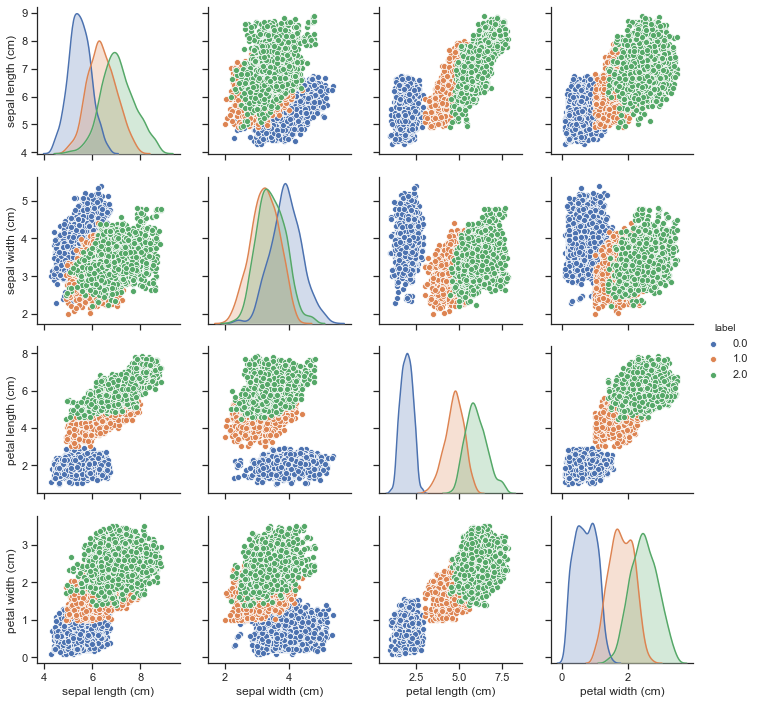

In [156]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(iris_df, 
             vars=iris_df.columns[:-1],
             hue='label',
             diag_kind="kde")

# KNN


In [157]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

In [158]:
# split train and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_refined, y_refined, 
                                                    test_size=0.2, random_state=42)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((3720, 4), (3720,), (930, 4), (930,))

In [159]:
# model
knn = KNeighborsClassifier()

In [160]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [161]:
y_pred = knn.predict(X_test)

In [162]:
y_pred[:100], y_test[:100]

(array([2, 1, 1, 2, 2, 2, 2, 0, 0, 2, 0, 0, 0, 1, 1, 0, 2, 1, 0, 0, 1, 1,
        2, 0, 1, 0, 2, 2, 2, 2, 0, 2, 2, 0, 1, 0, 0, 2, 0, 0, 2, 2, 1, 1,
        2, 0, 0, 0, 0, 2, 1, 2, 0, 2, 0, 1, 1, 0, 1, 2, 1, 2, 2, 0, 1, 2,
        1, 1, 0, 1, 2, 0, 0, 2, 1, 2, 0, 2, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2,
        1, 1, 2, 2, 2, 0, 0, 2, 1, 2, 0, 1]),
 array([2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 0, 0, 0, 1, 1, 0, 2, 1, 0, 0, 1, 2,
        1, 0, 1, 0, 1, 1, 2, 2, 0, 2, 1, 0, 1, 0, 0, 2, 0, 0, 2, 2, 1, 1,
        2, 0, 0, 0, 0, 2, 1, 2, 0, 2, 0, 1, 2, 0, 2, 2, 1, 2, 1, 0, 1, 2,
        1, 1, 0, 1, 2, 0, 0, 2, 1, 2, 0, 2, 2, 2, 1, 2, 2, 1, 1, 2, 1, 2,
        1, 1, 2, 2, 2, 0, 0, 2, 1, 2, 0, 1]))

In [163]:
knn.score(X_test, y_test)

0.9279569892473118

# SVM

In order to easy visulizing, we select two fatures from refined iris datasest according above preprocessing.

In [164]:
X_svm = X_refined[:, 2:]
y_svm = y_refined

In [165]:
X_svm.shape, y_svm.shape

((4650, 2), (4650,))

In [166]:
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy
xx, yy = make_meshgrid(X_svm[:, 0], X_svm[:, 1])

Text(0.5, 1.0, 'Data Ground Truth')

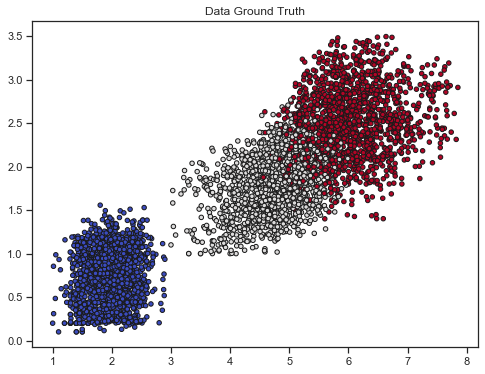

In [167]:
plt.figure(figsize=(8, 6))
plt.scatter(X_svm[:, 0], X_svm[:, 1], c=y_refined, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
plt.title('Data Ground Truth')

In [168]:
X_train, X_test, y_train, y_test = train_test_split(X_svm, y_svm, 
                                                    test_size=0.2, random_state=42)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((3720, 2), (3720,), (930, 2), (930,))

In [171]:
from sklearn import svm

svm_linear = svm.SVC(kernel='linear')
svm_rbf = svm.SVC(kernel='rbf', gamma=0.7)
svm_poly = svm.SVC(kernel='poly', degree=3, gamma='auto')

In [172]:
svm_linear.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [173]:
svm_rbf.fit(X_svm, y_svm)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.7, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [174]:
svm_poly.fit(X_svm, y_svm)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [175]:
z_preds_linear = svm_linear.predict(np.c_[xx.ravel(), yy.ravel()])
z_preds_linear = z_preds_linear.reshape(xx.shape)
z_preds_rbf = svm_rbf.predict(np.c_[xx.ravel(), yy.ravel()])
z_preds_rbf = z_preds_rbf.reshape(xx.shape)
z_preds_poly = svm_poly.predict(np.c_[xx.ravel(), yy.ravel()])
z_preds_poly = z_preds_poly.reshape(xx.shape)

Text(0.5, 1.0, 'SVM Polynomial')

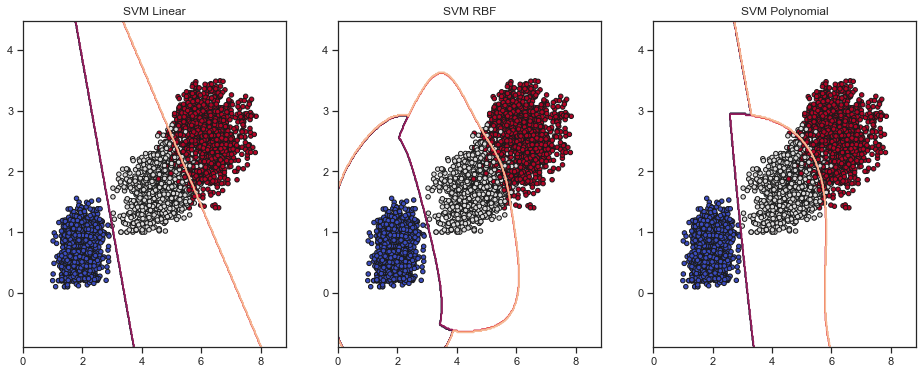

In [176]:
plt.figure(figsize=(16, 6))
plt.subplot(131)
plt.scatter(X_svm[:, 0], X_svm[:, 1], c=y_refined, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
plt.contour(xx, yy, z_preds_linear)
plt.title('SVM Linear')

plt.subplot(132)
plt.scatter(X_svm[:, 0], X_svm[:, 1], c=y_refined, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
plt.contour(xx, yy, z_preds_rbf)
plt.title('SVM RBF')

plt.subplot(133)
plt.scatter(X_svm[:, 0], X_svm[:, 1], c=y_refined, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
plt.contour(xx, yy, z_preds_poly)
plt.title('SVM Polynomial')

In [177]:
svm_linear.score(X_test, y_test), svm_rbf.score(X_test, y_test), svm_poly.score(X_test, y_test)

(0.9354838709677419, 0.9333333333333333, 0.9311827956989247)

# LR-SGD / ElasticNet / LBFS

In [178]:
# LR-SGD
from sklearn.linear_model import SGDClassifier
# elastic net
from sklearn.linear_model import ElasticNet
# lr-lbfgs
from sklearn.linear_model import LogisticRegression

In [179]:
lr_sgd = SGDClassifier(max_iter=1000)
lr_elastic_net = ElasticNet(random_state=0)
lr_lbfs = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')

In [180]:
lr_sgd.fit(X_train, y_train)

/Users/wind/WORK/code/mistywind_baby_learning/venv_baby_learning/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=1000,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [181]:
lr_elastic_net.fit(X_train, y_train)

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=0, selection='cyclic', tol=0.0001, warm_start=False)

In [182]:
lr_lbfs.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=0, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [183]:
z_preds_lr_sgd = lr_sgd.predict(np.c_[xx.ravel(), yy.ravel()])
z_preds_lr_sgd = z_preds_linear.reshape(xx.shape)
z_preds_lr_elastic_net = lr_elastic_net.predict(np.c_[xx.ravel(), yy.ravel()])
z_preds_lr_elastic_net = np.floor(z_preds_lr_elastic_net.reshape(xx.shape))
z_preds_lr_lbfs = lr_lbfs.predict(np.c_[xx.ravel(), yy.ravel()])
z_preds_lr_lbfs = z_preds_lr_lbfs.reshape(xx.shape)

Text(0.5, 1.0, 'LR-LBFS')

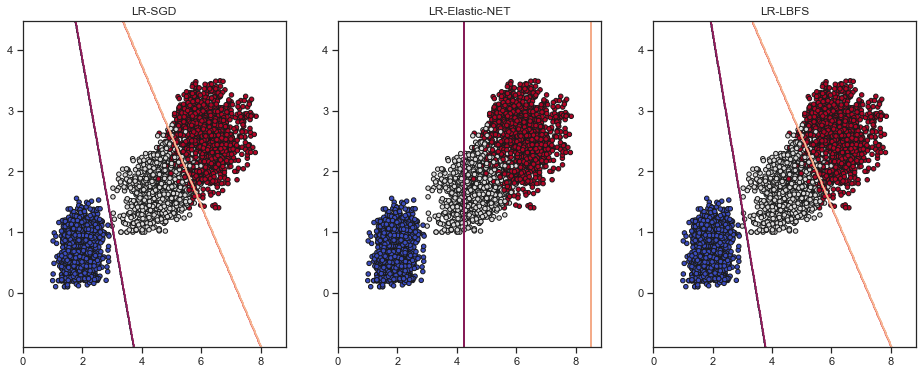

In [184]:

plt.figure(figsize=(16, 6))
plt.subplot(131)
plt.scatter(X_svm[:, 0], X_svm[:, 1], c=y_refined, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
plt.contour(xx, yy, z_preds_lr_sgd)
plt.title('LR-SGD')

plt.subplot(132)
plt.scatter(X_svm[:, 0], X_svm[:, 1], c=y_refined, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
plt.contour(xx, yy, z_preds_lr_elastic_net)
plt.title('LR-Elastic-NET')

plt.subplot(133)
plt.scatter(X_svm[:, 0], X_svm[:, 1], c=y_refined, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
plt.contour(xx, yy, z_preds_lr_lbfs)
plt.title('LR-LBFS')


In [185]:
lr_elastic_net.coef_

array([0.23488425, 0.        ])

In [186]:
lr_lbfs.coef_

array([[-5.01249597, -2.35990644],
       [ 0.68948677, -0.40286335],
       [ 4.3230092 ,  2.76276979]])

In [187]:
lr_sgd.coef_

array([[-13.18897103,  -5.054909  ],
       [  0.06532066,  -0.09926028],
       [ 23.33182698,  15.90218413]])

In [188]:
lr_elastic_net.score(X_test, y_test), lr_lbfs.score(X_test, y_test), lr_sgd.score(X_test, y_test)

(0.6973904788088584, 0.9354838709677419, 0.9333333333333333)

# Naive Bayes

In [189]:
# naive bayes
from sklearn.naive_bayes import GaussianNB

In [190]:
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [191]:
z_preds_nb = nb.predict(np.c_[xx.ravel(), yy.ravel()])
z_preds_nb = z_preds_nb.reshape(xx.shape)

Text(0.5, 1.0, 'NB')

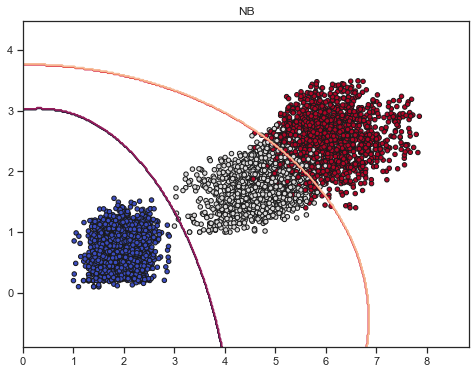

In [192]:
plt.figure(figsize=(8, 6))
plt.scatter(X_svm[:, 0], X_svm[:, 1], c=y_refined, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
plt.contour(xx, yy, z_preds_nb)
plt.title('NB')

In [193]:
nb.score(X_test, y_test)

0.9279569892473118